In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

In [4]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 102s 632ms/step - loss: 0.5814 - acc: 0.6877 - val_loss: 0.4850 - val_acc: 0.7748
Epoch 2/10
157/157 [==============================] - 98s 622ms/step - loss: 0.3748 - acc: 0.8454 - val_loss: 0.3605 - val_acc: 0.8478
Epoch 3/10
157/157 [==============================] - 98s 625ms/step - loss: 0.3006 - acc: 0.8803 - val_loss: 0.3901 - val_acc: 0.8248
Epoch 4/10
157/157 [==============================] - 98s 622ms/step - loss: 0.2455 - acc: 0.9057 - val_loss: 0.3678 - val_acc: 0.8448
Epoch 5/10
157/157 [==============================] - 97s 616ms/step - loss: 0.2003 - acc: 0.9226 - val_loss: 0.3904 - val_acc: 0.8314
Epoch 6/10
157/157 [==============================] - 96s 613ms/step - loss: 0.1655 - acc: 0.9394 - val_loss: 0.4529 - val_acc: 0.8156
Epoch 7/10
157/157 [==============================] - 97s 620ms/step - loss: 0.1223 - acc: 0.9552 - val_loss: 0.4420 - val_acc: 0.8456
Epoch 8/10
157/157 [==============================] - 

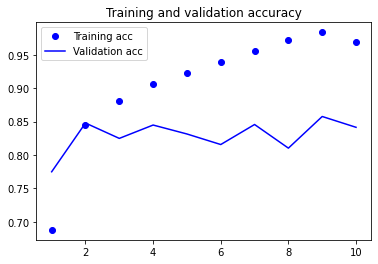

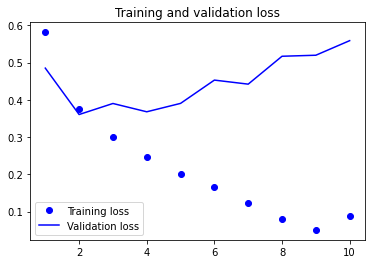

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 88ms/step - loss: 0.4957 - acc: 0.7696 - val_loss: 0.3448 - val_acc: 0.8624
Epoch 2/10
157/157 [==============================] - 13s 83ms/step - loss: 0.2901 - acc: 0.8873 - val_loss: 0.2989 - val_acc: 0.8794
Epoch 3/10
157/157 [==============================] - 13s 82ms/step - loss: 0.2351 - acc: 0.9103 - val_loss: 0.3736 - val_acc: 0.8776
Epoch 4/10
157/157 [==============================] - 13s 81ms/step - loss: 0.1998 - acc: 0.9263 - val_loss: 0.2810 - val_acc: 0.8854
Epoch 5/10
157/157 [==============================] - 12s 79ms/step - loss: 0.1759 - acc: 0.9359 - val_loss: 0.4420 - val_acc: 0.8702
Epoch 6/10
157/157 [==============================] - 12s 79ms/step - loss: 0.1562 - acc: 0.9438 - val_loss: 0.3380 - val_acc: 0.8758
Epoch 7/10
157/157 [==============================] - 12s 78ms/step - loss: 0.1444 - acc: 0.9481 - val_loss: 0.3101 - val_acc: 0.8800
Epoch 8/10
157/157 [==============================] - 12s 79ms

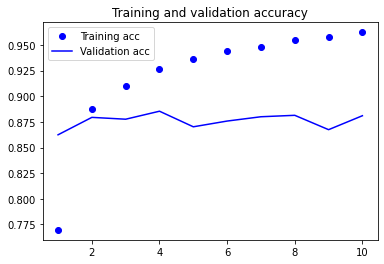

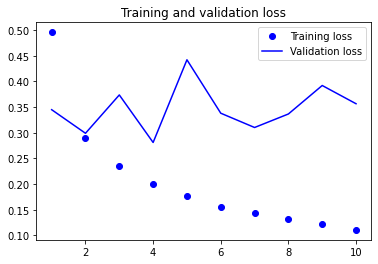

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()